In [ ]:
import torch
import torch.nn.functional as F
from torch import nn, optim
from torchvision import datasets, transforms

from sklearn.datasets import make_blobs
from sklearn.datasets import make_moons

import matplotlib.pyplot as plt
import numpy as np

['yellow', 'yellow', 'yellow', 'red', 'blue', 'yellow', 'blue', 'yellow', 'blue', 'blue', 'red', 'red', 'blue', 'red', 'red']


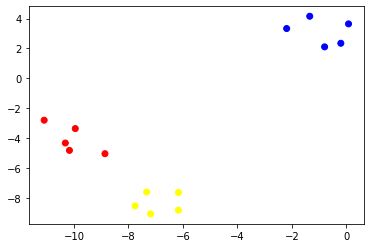

In [ ]:
X, y = make_blobs(n_samples=15, n_features=2, centers=3, random_state=1)
#print(y)
d = ['blue', 'red', 'yellow']
colors = [ d[i]  for i in y]
print(colors)

plt.scatter(X[:, 0], X[:, 1], color=colors)


X = torch.tensor(X).float()
y = torch.tensor(y).long()

In [ ]:
layer = torch.nn.Linear(2, 3)

optimizer = optim.SGD(layer.parameters() , lr=0.01)

epochs = 3
for epoch in range(epochs):
    
    hypothesis = layer(X)
    cost_fn = nn.CrossEntropyLoss()    

    cost = cost_fn(hypothesis, y)       
                  
    optimizer.zero_grad()
    cost.backward()
    optimizer.step()

    # 100번마다 로그 출력
    if epoch % 100 == 0:
        print(f'epoch = {epoch+1}    cost={cost.item()}')     

epoch = 1    cost=2.6594972610473633


In [ ]:
p  # Wx + b= layer(X) 
#print(p)
print(torch.argmax(p, axis =1))   
print(y)

accuracy = (torch.argmax(p, axis =1) == y).float().mean()
print(accuracy)


tensor([2, 2, 2, 1, 0, 2, 0, 2, 0, 0, 1, 1, 0, 1, 1])
tensor([2, 2, 2, 1, 0, 2, 0, 2, 0, 0, 1, 1, 0, 1, 1])
tensor(1.)


tensor([-20.0000,   3.0000,   6.0000,  12.0000])


([<matplotlib.patches.Wedge at 0x7fb9f76337d0>,
 [Text(1.0999999971562915, 7.909588430682824e-05, ''),
  Text(-1.0999999902235176, -0.00014665695184706094, ''),
  Text(1.099999994292835, 0.0001120525026824562, ''),
  Text(1.0999999991656482, 4.2843604027461e-05, '')])

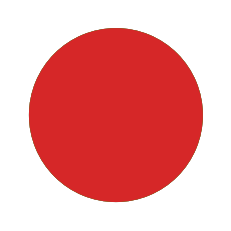

In [ ]:
p = torch.tensor([-8, 1.2, 2.4, 4.8]).float()

n_p = p / torch.sum(p)
print(n_p)

torch.max(n_p), torch.argmax(n_p)
plt.pie(n_p)

tensor([2.4693e-06, 2.4439e-02, 8.1140e-02, 8.9442e-01])


([<matplotlib.patches.Wedge at 0x7fb9f7609350>,
 [Text(1.0999999999669017, 8.533241657966813e-06, ''),
  Text(1.0967582016727835, 0.08438866667676595, ''),
  Text(1.00949923840123, 0.4369339625931323, ''),
  Text(-1.0400416316527274, -0.3582086046274331, '')])

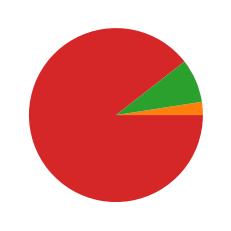

In [ ]:
n_sm = torch.exp(p) / torch.sum( torch.exp(p))
print(n_sm)
plt.pie(n_sm)

# 다층신경망

In [ ]:
X = torch.tensor([[0,0],
              [0,1],
              [1,0],
              [1,1]]).float()

y = torch.tensor([[0],  [1], [1],   [0]]).float()
"""
layer1 = nn.Linear(2, 5)  #  은닉1
layer2 = nn.Linear(5, 5)  #  은닉2
layer3 = nn.Linear(5, 3)  #  은닉3
layer4 = nn.Linear(3, 1)  #  출력
"""

layer1 = nn.Linear(2, 5)  #  은닉1
layer2 = nn.Linear(5, 1)  #  출력

sigmoid = nn.Sigmoid()

model = nn.Sequential(layer1, sigmoid, mlayer2, sigmoid)

optimizer = optim.SGD(model.parameters(), lr=0.1)

epochs = 20000
for epoch in range(epochs):
    
    hypothesis = model(X)    # 4 X 2,       4X1
    
    cost_fn = nn.BCELoss()                  
    cost = cost_fn(hypothesis, y)       
                  
    optimizer.zero_grad()
    cost.backward()
    optimizer.step()

    # 100번마다 로그 출력
    if epoch % 1000 == 0:
        print(f'epoch = {epoch+1}    cost={cost.item()}')      

model(X)

epoch = 1    cost=0.7215338945388794
epoch = 1001    cost=0.692215085029602
epoch = 2001    cost=0.6892226338386536
epoch = 3001    cost=0.6632760167121887
epoch = 4001    cost=0.5306913256645203
epoch = 5001    cost=0.20437856018543243
epoch = 6001    cost=0.07568110525608063
epoch = 7001    cost=0.042421113699674606
epoch = 8001    cost=0.028754575178027153
epoch = 9001    cost=0.021524207666516304
epoch = 10001    cost=0.017103806138038635
epoch = 11001    cost=0.014140641316771507
epoch = 12001    cost=0.01202429924160242
epoch = 13001    cost=0.010441238060593605
epoch = 14001    cost=0.009214704856276512
epoch = 15001    cost=0.008237859234213829
epoch = 16001    cost=0.007442359812557697
epoch = 17001    cost=0.006782538257539272
epoch = 18001    cost=0.006226901896297932
epoch = 19001    cost=0.005752796307206154


tensor([[0.0039],
        [0.9937],
        [0.9952],
        [0.0063]], grad_fn=<SigmoidBackward>)

In [ ]:
X = torch.tensor([[0,0],
              [0,1],
              [1,0],
              [1,1]]).float()

y = torch.tensor([[0],  [1], [1],   [0]]).float()


model = nn.Sequential(
          nn.Linear(2,5),
          nn.Sigmoid(),
          nn.Linear(5, 10),
          nn.Sigmoid(),
          nn.Linear(10,1),
          nn.Sigmoid(),          
        )
    
optimizer = optim.SGD(model.parameters(), lr=0.1)

epochs = 5000
for epoch in range(epochs):
    
    hypothesis = model(X)
    
    cost_fn = nn.BCELoss()                  
    cost = cost_fn(hypothesis, y)       
                  
    optimizer.zero_grad()
    cost.backward()
    optimizer.step()

    # 100번마다 로그 출력
    if epoch % 1000 == 0:
        print(f'epoch = {epoch+1}    cost={cost.item()}')      
model(X)   

epoch = 1    cost=0.738640546798706
epoch = 1001    cost=0.6931531429290771
epoch = 2001    cost=0.6931405663490295
epoch = 3001    cost=0.6931277513504028
epoch = 4001    cost=0.6931139230728149


tensor([[0.5001],
        [0.4993],
        [0.5008],
        [0.4999]], grad_fn=<SigmoidBackward>)

In [ ]:
X = torch.tensor([[0,0],
              [0,1],
              [1,0],
              [1,1]]).float()

y = torch.tensor([[0],  [1], [1],   [0]]).float()


class Model(nn.Module):
    def __init__(self):
        super(Model, self).__init__()
        self.layer1 = nn.Linear(2, 10)
        self.layer2 = nn.Linear(10, 1)        
        
    def forward(self, x):
        x = torch.sigmoid(self.layer1(x))
        x = torch.sigmoid(self.layer2(x))
        return x
    
model = Model()
    
optimizer = optim.SGD(model.parameters(), lr=0.1)

epochs = 5000
for epoch in range(epochs):
    
    hypothesis = model(X)
    
    cost_fn = nn.BCELoss()                  
    cost = cost_fn(hypothesis, y)       
                  
    optimizer.zero_grad()
    cost.backward()
    optimizer.step()

    # 100번마다 로그 출력
    if epoch % 1000 == 0:
        print(f'epoch = {epoch+1}    cost={cost.item()}')      
model(X)   

epoch = 1    cost=0.6942291259765625
epoch = 1001    cost=0.6911473870277405
epoch = 2001    cost=0.6783214211463928
epoch = 3001    cost=0.46505096554756165
epoch = 4001    cost=0.12408523261547089


tensor([[0.0354],
        [0.9452],
        [0.9449],
        [0.0718]], grad_fn=<SigmoidBackward>)

In [ ]:
X = torch.tensor([[0,0],
              [0,1],
              [1,0],
              [1,1]]).float()

y = torch.tensor([[0],  [1], [1],   [0]]).float()

class Model(nn.Module):
    def __init__(self):
        super(Model, self).__init__()
        
        self.layer = nn.Sequential(
          nn.Linear(2,10),
          nn.ReLU(),
          nn.Linear(10,5),
          nn.ReLU(),
          nn.Linear(5,5),
          nn.ReLU(),
          nn.Linear(5,5),
          nn.ReLU(),
          nn.Linear(5,5),
          nn.ReLU(),
          nn.Linear(5,5),
          nn.ReLU(),
          nn.Linear(5,5),
          nn.ReLU(),
          nn.Linear(5, 1),
          nn.Sigmoid(),          
        )
        
    def forward(self, x):        
        return self.layer(x)     
    
model = Model()
    
optimizer = optim.SGD(model.parameters(), lr=0.1)

epochs = 5000
for epoch in range(epochs):
    
    hypothesis = model(X)
    
    cost_fn = nn.BCELoss()                  
    cost = cost_fn(hypothesis, y)       
                  
    optimizer.zero_grad()
    cost.backward()
    optimizer.step()

    # 100번마다 로그 출력
    if epoch % 500 == 0:
        print(f'epoch = {epoch+1}    cost={cost.item()}')      
model(X)   

epoch = 1    cost=0.6989039778709412
epoch = 501    cost=0.6931442618370056
epoch = 1001    cost=0.6931431889533997
epoch = 1501    cost=0.6931419968605042
epoch = 2001    cost=0.6931406855583191
epoch = 2501    cost=0.6931391954421997
epoch = 3001    cost=0.6931376457214355
epoch = 3501    cost=0.6931363344192505
epoch = 4001    cost=0.6931350231170654
epoch = 4501    cost=0.6931335926055908


tensor([[0.5000],
        [0.5000],
        [0.5000],
        [0.5000]], grad_fn=<SigmoidBackward>)

# 정규화

In [ ]:
X = torch.tensor([[10, 25, 100],
              [12, 29, 140],
              [9, 30, 150]]).float() 

X = X / torch.max(X, axis=0)[0]

print(X)

tensor([[0.8333, 0.8333, 0.6667],
        [1.0000, 0.9667, 0.9333],
        [0.7500, 1.0000, 1.0000]])


In [ ]:
data = np.loadtxt("diabetes.csv", delimiter=",", dtype=np.float32)
print(data.shape)

X = data[:, 0:8] 

y = data[:, 8]

X = torch.tensor(X).float()
X = X / torch.max(X, axis=0)[0]

y = torch.tensor(y).reshape(-1,1)



(768, 9)


In [ ]:
layer = torch.nn.Linear(8, 1)

optimizer = optim.Adam(layer.parameters() , lr=0.001)

epochs = 6000
for epoch in range(epochs):    
    hypothesis = torch.sigmoid(layer(X))    
    cost_fn = nn.BCELoss()                  
    cost = cost_fn(hypothesis, y)       
                  
    optimizer.zero_grad()
    cost.backward()
    optimizer.step()

    # 100번마다 로그 출력
    if epoch % 100 == 0:
        print(f'epoch = {epoch+1}    cost={cost.item()}')
        
predict = torch.sigmoid(layer(X))  > 0.5
(predict == y).float().mean()      

epoch = 1    cost=0.7024438977241516
epoch = 101    cost=0.6631112694740295
epoch = 201    cost=0.6512489914894104
epoch = 301    cost=0.6459068655967712
epoch = 401    cost=0.6413560509681702
epoch = 501    cost=0.636917233467102
epoch = 601    cost=0.6325392723083496
epoch = 701    cost=0.6282265186309814
epoch = 801    cost=0.6239885091781616
epoch = 901    cost=0.6198346614837646
epoch = 1001    cost=0.6157726049423218
epoch = 1101    cost=0.611807644367218
epoch = 1201    cost=0.6079431176185608
epoch = 1301    cost=0.604180097579956
epoch = 1401    cost=0.6005181670188904
epoch = 1501    cost=0.5969555974006653
epoch = 1601    cost=0.593489408493042
epoch = 1701    cost=0.5901160836219788
epoch = 1801    cost=0.586831271648407
epoch = 1901    cost=0.5836306214332581
epoch = 2001    cost=0.5805093050003052
epoch = 2101    cost=0.5774629712104797
epoch = 2201    cost=0.5744872689247131
epoch = 2301    cost=0.5715780854225159
epoch = 2401    cost=0.5687319040298462
epoch = 2501    c

tensor(0.7695)

(array([ 20.,  60., 137., 215., 237., 189., 107.,  26.,   8.,   1.]),
 array([-2.6914685 , -2.06269   , -1.4339116 , -0.8051331 , -0.17635465,
         0.4524238 ,  1.0812023 ,  1.7099807 ,  2.3387592 ,  2.9675376 ,
         3.596316  ], dtype=float32),
 <a list of 10 Patch objects>)

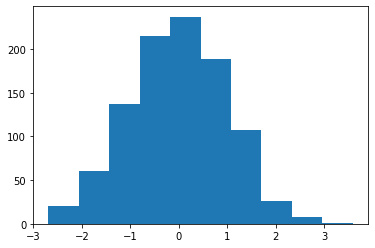

In [ ]:
h = torch.randn(1000)
plt.hist(h)

# CNN

In [ ]:
transform = transforms.Compose([transforms.ToTensor(),
                                transforms.Normalize((0.5, ), (1.0, ))
                               ])

trainset = datasets.FashionMNIST('F_MNIST_data/', download=True, train=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)


testset = datasets.FashionMNIST('F_MNIST_data/', download=True, train=False, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=64, shuffle=True)


Extracting F_MNIST_data/FashionMNIST/raw/train-images-idx3-ubyte.gz to F_MNIST_data/FashionMNIST/raw




Extracting F_MNIST_data/FashionMNIST/raw/train-labels-idx1-ubyte.gz to F_MNIST_data/FashionMNIST/raw




Extracting F_MNIST_data/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to F_MNIST_data/FashionMNIST/raw




Extracting F_MNIST_data/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to F_MNIST_data/FashionMNIST/raw



/usr/local/lib/python3.7/dist-packages/torchvision/datasets/mnist.py:498: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at  /pytorch/torch/csrc/utils/tensor_numpy.cpp:180.)
  return torch.from_numpy(parsed.astype(m[2], copy=False)).view(*s)


In [ ]:
image, label = next(iter(trainloader))

In [ ]:
print(image.shape)
print(label)

torch.Size([64, 1, 28, 28])
tensor([8, 2, 5, 3, 1, 2, 5, 0, 3, 4, 5, 5, 7, 1, 6, 1, 4, 1, 3, 1, 8, 6, 8, 1,
        5, 3, 9, 8, 9, 6, 6, 2, 8, 9, 4, 1, 8, 8, 3, 4, 7, 9, 0, 5, 8, 8, 3, 2,
        7, 5, 7, 8, 2, 3, 2, 2, 0, 3, 6, 4, 2, 2, 4, 2])


Bag


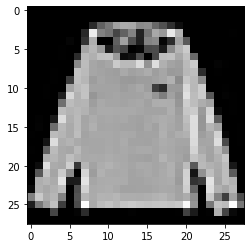

In [ ]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
print(class_names[label[0]])
plt.imshow(image[1,0,:,:], cmap='gray')

In [ ]:
class Model(nn.Module):
    def __init__(self, num_classes=10):
        super(Model, self).__init__()
        self.layer1 = nn.Sequential(
            
    nn.Conv2d(1,32,kernel_size=3,padding=1),
    nn.ReLU(),
    nn.MaxPool2d(2,2),                    #     64x32x14x14

    nn.Conv2d(32,128,kernel_size=3,padding=1),  
    nn.ReLU(),
    nn.MaxPool2d(2,2),                     #      64x128x7x7

    nn.Flatten(),
    nn.Linear(128*7*7, 256),          
    nn.ReLU(),
    nn.Linear(256,10))
        
    def forward(self, x):
        out = self.layer1(x)
        return out

In [ ]:
model     = Model()
model.cuda()

optimizer = torch.optim.Adam(model.parameters(), lr=0.001)
loss_fn   = nn.CrossEntropyLoss()    

epochs = 5

for e in range(epochs) :
    running_loss = 0
    for images, labels in trainloader:
        images = images.cuda()
        labels = labels.cuda()
        
        y_pred = model(images)
        loss = loss_fn(y_pred, labels)  
    
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        running_loss += loss.item()    
    print(f"\rTraining loss: {running_loss/len(trainloader)}") 

Training loss: 0.4165062469714232
Training loss: 0.2642771833216839
Training loss: 0.21234369940404443
Training loss: 0.17723970073880926
Training loss: 0.14702668078124587


In [ ]:
accuracy = 0
with torch.no_grad():
    for images, labels in testloader: #trainloader:
        images = images.cuda()
        labels = labels.cuda()
        y_pred = model(images)
        correct = (torch.argmax(y_pred, dim=1) == labels).float()
        accuracy += torch.mean(correct)        
accuracy/len(testloader) 

tensor(0.9202, device='cuda:0')